

 # Loading the data

In [ ]:
!wget https://github.com/omkar3602/pneumonia-detection-dataset/raw/master/chest_xray.zip

--2022-06-17 18:52:44--  https://github.com/omkar3602/pneumonia-detection-dataset/raw/master/chest_xray.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/omkar3602/pneumonia-detection-dataset/master/chest_xray.zip [following]
--2022-06-17 18:52:44--  https://media.githubusercontent.com/media/omkar3602/pneumonia-detection-dataset/master/chest_xray.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225655214 (1.1G) [application/zip]
Saving to: ‘chest_xray.zip.3’

chest_xray.zip.3    100%[===================>]   1.14G   263MB/s    in 4.4s    

2022-06-17 18:53:03 (267 MB/s) 

In [ ]:
!unzip chest_xray.zip

In [ ]:
import random
import numpy as np
import cv2
import os

In [ ]:
TRAIN_DIR = "chest_xray/train"
# VALID_DIR = "chest_xray/val"
TEST_DIR = "chest_xray/test"

In [ ]:
classes = ["NORMAL", "PNEUMONIA"]

In [ ]:
img_size = 150

In [ ]:
def create_data(DIR):
    data = []
    for category in classes:
        path = os.path.join(DIR, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([img_arr, class_num])

    return data

train_data = create_data(TRAIN_DIR)
# valid_data = create_data(VALID_DIR)
test_data = create_data(TEST_DIR)

In [ ]:
print("\n\nNumber of images in Training Dataset : ", len(train_data))
# print("\n\nNumber of images in Validation Dataset : ", len(valid_data))
print("\n\nNumber of images in Test Dataset : ", len(test_data))



Number of images in Training Dataset :  5216


Number of images in Test Dataset :  624


In [ ]:
random.shuffle(train_data)
# random.shuffle(valid_data)
random.shuffle(test_data)

# Data preprocessing

In [ ]:
def preprocess_and_populate_data(source_data):
    X_data = []
    y_data = []
    for features, label in source_data:
        X_data.append(features)
        y_data.append(label)
    X_data = np.array(X_data).reshape(-1, img_size, img_size, 1)
    X_data = X_data / 255.

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    return X_data, y_data

X_train, y_train = preprocess_and_populate_data(train_data)
# X_valid, y_valid = preprocess_and_populate_data(valid_data)
X_test, y_test = preprocess_and_populate_data(test_data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [ ]:
print("\n\nNumber of images in Training Dataset : ", len(X_train), " Healthy : ", np.count_nonzero(y_train == 1), " Pneumonia : ", np.count_nonzero(y_train == 0))
print("\n\nNumber of images in Validation Dataset : ", len(X_valid), " Healthy : ", np.count_nonzero(y_valid == 1), " Pneumonia : ", np.count_nonzero(y_valid == 0))
print("\n\nNumber of images in Test Dataset : ", len(X_test), " Healthy : ", np.count_nonzero(y_test == 1), " Pneumonia : ", np.count_nonzero(y_test == 0))



Number of images in Training Dataset :  4694  Healthy :  3475  Pneumonia :  1219


Number of images in Validation Dataset :  522  Healthy :  400  Pneumonia :  122


Number of images in Test Dataset :  624  Healthy :  390  Pneumonia :  234


# CNN Model

In [ ]:
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = X_train.shape[1:] , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64 , kernel_initializer='uniform' , activation="relu"))
model.add(Dense(128 , kernel_initializer='uniform', activation="relu"))
model.add(Dense(64 , kernel_initializer='uniform', activation="relu"))
model.add(Dense(1 , kernel_initializer='uniform', activation="sigmoid"))

model.compile( loss = "binary_crossentropy",
                  optimizer = "adam" ,
                  metrics = ["accuracy"]
                 )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 15, validation_data = (X_valid, y_valid))

Epoch 1/15
94/94 [==============================] - 5s 42ms/step - loss: 0.4539 - accuracy: 0.7567 - val_loss: 0.2416 - val_accuracy: 0.9291
Epoch 2/15
94/94 [==============================] - 3s 37ms/step - loss: 0.1777 - accuracy: 0.9320 - val_loss: 0.1431 - val_accuracy: 0.9444
Epoch 3/15
94/94 [==============================] - 3s 37ms/step - loss: 0.1124 - accuracy: 0.9587 - val_loss: 0.1312 - val_accuracy: 0.9521
Epoch 4/15
94/94 [==============================] - 3s 37ms/step - loss: 0.1048 - accuracy: 0.9621 - val_loss: 0.1193 - val_accuracy: 0.9617
Epoch 5/15
94/94 [==============================] - 3s 37ms/step - loss: 0.0879 - accuracy: 0.9680 - val_loss: 0.1227 - val_accuracy: 0.9559
Epoch 6/15
94/94 [==============================] - 3s 37ms/step - loss: 0.0713 - accuracy: 0.9732 - val_loss: 0.1048 - val_accuracy: 0.9636
Epoch 7/15
94/94 [==============================] - 3s 37ms/step - loss: 0.0684 - accuracy: 0.9755 - val_loss: 0.0935 - val_accuracy: 0.9770
Epoch 8/15
94

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

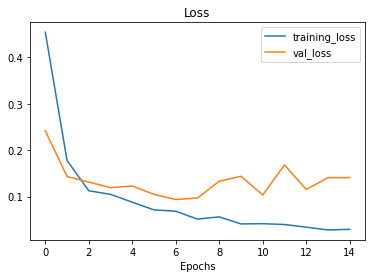

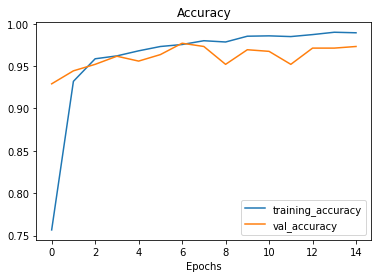

In [ ]:
plot_loss_curves(history)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

20/20 [==============================] - 0s 13ms/step - loss: 1.6320 - accuracy: 0.7804


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[224,  10],
       [213, 177]], dtype=int32)>

In [ ]:
model.save('pneumonia_detector.h5')

# Testing our CNN model

In [ ]:
def detect(model, image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (150, 150))
    img = np.array(img).reshape(-1, img_size, img_size, 1)
    img = img / 255.
    img = np.array(img)

    pred = model.predict([ img ])
    return 1 if pred[0][0]>0.5 else 0

In [ ]:
import matplotlib.pyplot as plt

def predict_and_plot(model, image_path, actual_class, classes):
    pred = detect(model, image_path)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img)
    plt.title(f"Prediction: {classes[pred]}\nActual: {actual_class}")
    plt.axis(False)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('pneumonia_detector.h5')

In [ ]:
random_category = np.random.choice(classes)
random_image = np.random.choice(os.listdir(os.path.join(TEST_DIR, random_category)))

path = os.path.join(TEST_DIR, random_category, random_image)
path

'chest_xray/test/PNEUMONIA/person108_bacteria_506.jpeg'

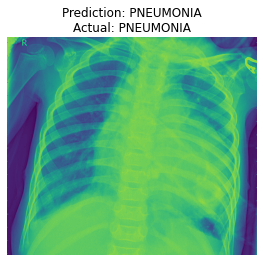

In [ ]:
predict_and_plot(model, path, random_category, classes)

## Transfer Learning



 # Loading the data

In [ ]:
def create_data(DIR):
    data = []
    for category in classes:
        path = os.path.join(DIR, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img))
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([img_arr, class_num])

    return data

train_data = create_data(TRAIN_DIR)
# valid_data = create_data(VALID_DIR)
test_data = create_data(TEST_DIR)

In [ ]:
print("\n\nNumber of images in Training Dataset : ", len(train_data))
# print("\n\nNumber of images in Validation Dataset : ", len(valid_data))
print("\n\nNumber of images in Test Dataset : ", len(test_data))



Number of images in Training Dataset :  5216


Number of images in Test Dataset :  624


In [ ]:
random.shuffle(train_data)
# random.shuffle(valid_data)
random.shuffle(test_data)

# Data preprocessing

In [ ]:
def preprocess_and_populate_data(source_data):
    X_data = []
    y_data = []
    for features, label in source_data:
        X_data.append(features)
        y_data.append(label)
    X_data = np.array(X_data).reshape(-1, img_size, img_size, 3)
    X_data = X_data / 255.

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    return X_data, y_data

X_train, y_train = preprocess_and_populate_data(train_data)
# X_valid, y_valid = preprocess_and_populate_data(valid_data)
X_test, y_test = preprocess_and_populate_data(test_data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [ ]:
print("\n\nNumber of images in Training Dataset : ", len(X_train), " Healthy : ", np.count_nonzero(y_train == 1), " Pneumonia : ", np.count_nonzero(y_train == 0))
print("\n\nNumber of images in Validation Dataset : ", len(X_valid), " Healthy : ", np.count_nonzero(y_valid == 1), " Pneumonia : ", np.count_nonzero(y_valid == 0))
print("\n\nNumber of images in Test Dataset : ", len(X_test), " Healthy : ", np.count_nonzero(y_test == 1), " Pneumonia : ", np.count_nonzero(y_test == 0))



Number of images in Training Dataset :  4694  Healthy :  3488  Pneumonia :  1206


Number of images in Validation Dataset :  522  Healthy :  387  Pneumonia :  135


Number of images in Test Dataset :  624  Healthy :  390  Pneumonia :  234


In [ ]:
y_train = tf.one_hot(y_train, depth=2)
y_valid = tf.one_hot(y_valid, depth=2)
y_test = tf.one_hot(y_test, depth=2)

# Load the pre-built model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
IMAGE_SHAPE = (img_size, img_size)

In [ ]:
def create_model(model_url, num_classes=2):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

# resnet_model

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=2)

# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(X_train, 
                                  y_train,
                                  epochs=5,
                                  steps_per_epoch=len(X_train),
                                  validation_data=(X_valid, y_valid),
                                  validation_steps=len(X_valid),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20220617-190416
Epoch 1/5
4694/4694 [==============================] - 54s 11ms/step - loss: 0.1629 - accuracy: 0.9391 - val_loss: 0.0959 - val_accuracy: 0.9655
Epoch 2/5
4694/4694 [==============================] - 48s 10ms/step - loss: 0.1082 - accuracy: 0.9608 - val_loss: 0.1266 - val_accuracy: 0.9579
Epoch 3/5
4694/4694 [==============================] - 48s 10ms/step - loss: 0.0952 - accuracy: 0.9687 - val_loss: 0.1344 - val_accuracy: 0.9636
Epoch 4/5
4694/4694 [==============================] - 47s 10ms/step - loss: 0.0728 - accuracy: 0.9736 - val_loss: 0.1114 - val_accuracy: 0.9636
Epoch 5/5
4694/4694 [==============================] - 47s 10ms/step - loss: 0.0658 - accuracy: 0.9751 - val_loss: 0.1104 - val_accuracy: 0.9636


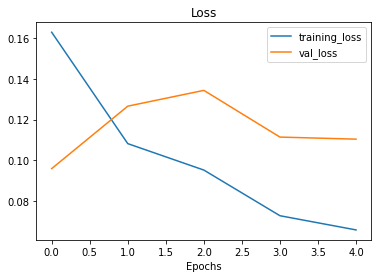

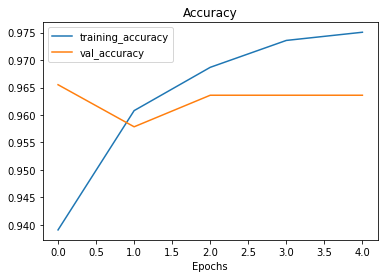

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
loss, accuracy = resnet_model.evaluate(X_test, y_test, verbose=1)

20/20 [==============================] - 3s 82ms/step - loss: 0.8920 - accuracy: 0.8333


In [ ]:
y_pred = resnet_model.predict(X_test)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[266, 718],
       [264,   0]], dtype=int32)>

In [ ]:
resnet_model.save('resnet_model.h5')

# Testing our resnet_model

In [ ]:
def detect(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = np.array(img).reshape(-1, img_size, img_size, 3)
    img = img / 255.
    img = np.array(img)

    pred = model.predict([ img ])
    pred = pred.flatten()
    return np.argmax(pred)

In [ ]:
import matplotlib.pyplot as plt

def predict_and_plot(model, image_path, actual_class, classes):
    pred = detect(model, image_path)
    img = cv2.imread(image_path)

    plt.imshow(img)
    plt.title(f"Prediction: {classes[pred]}\nActual: {actual_class}")
    plt.axis(False)

In [ ]:
from tensorflow.keras.models import load_model
resnet_model = load_model('resnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
random_category = np.random.choice(classes)
random_image = np.random.choice(os.listdir(os.path.join(TEST_DIR, random_category)))

path = os.path.join(TEST_DIR, random_category, random_image)
path

'chest_xray/test/NORMAL/NORMAL2-IM-0323-0001.jpeg'

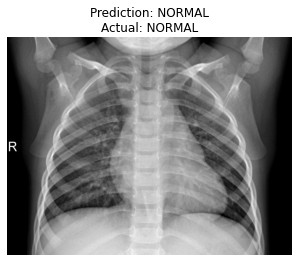

In [ ]:
predict_and_plot(resnet_model, path, random_category, classes)

# efficientnet_model

In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=2)

In [ ]:
# Compile EfficientNet model
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [ ]:
# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(X_train,
                                              y_train,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(X_train),
                                              validation_data=(X_valid, y_valid),
                                              validation_steps=len(X_valid),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220617-191216
Epoch 1/5
4694/4694 [==============================] - 68s 13ms/step - loss: 0.1607 - accuracy: 0.9365 - val_loss: 0.1598 - val_accuracy: 0.9253
Epoch 2/5
4694/4694 [==============================] - 56s 12ms/step - loss: 0.0985 - accuracy: 0.9619 - val_loss: 0.1620 - val_accuracy: 0.9444
Epoch 3/5
4694/4694 [==============================] - 55s 12ms/step - loss: 0.0869 - accuracy: 0.9655 - val_loss: 0.1253 - val_accuracy: 0.9521
Epoch 4/5
4694/4694 [==============================] - 55s 12ms/step - loss: 0.0770 - accuracy: 0.9715 - val_loss: 0.1022 - val_accuracy: 0.9617
Epoch 5/5
4694/4694 [==============================] - 55s 12ms/step - loss: 0.0674 - accuracy: 0.9746 - val_loss: 0.1158 - val_accuracy: 0.9502


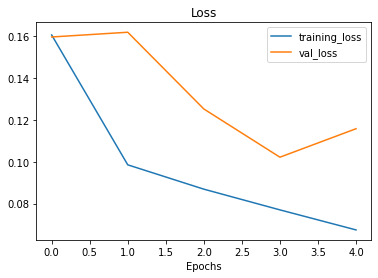

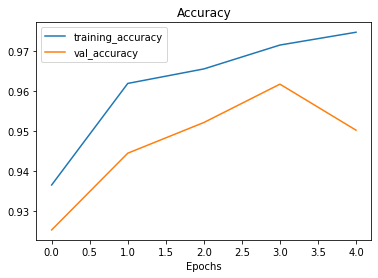

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
loss, accuracy = efficientnet_model.evaluate(X_test, y_test, verbose=1)

20/20 [==============================] - 3s 54ms/step - loss: 0.4525 - accuracy: 0.8542


In [ ]:
y_pred = efficientnet_model.predict(X_test)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[419, 590],
       [239,   0]], dtype=int32)>

In [ ]:
efficientnet_model.save('efficientnet_model.h5')

# Testing our efficientnet_model

In [ ]:
def detect(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = np.array(img).reshape(-1, img_size, img_size, 3)
    img = img / 255.
    img = np.array(img)

    pred = model.predict([ img ])
    pred = pred.flatten()
    return np.argmax(pred)

In [ ]:
import matplotlib.pyplot as plt

def predict_and_plot(model, image_path, actual_class, classes):
    pred = detect(model, image_path)
    img = cv2.imread(image_path)

    plt.imshow(img)
    plt.title(f"Prediction: {classes[pred]}\nActual: {actual_class}")
    plt.axis(False)

In [ ]:
from tensorflow.keras.models import load_model
efficientnet_model = load_model('efficientnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
random_category = np.random.choice(classes)
random_image = np.random.choice(os.listdir(os.path.join(TEST_DIR, random_category)))

path = os.path.join(TEST_DIR, random_category, random_image)
path

'chest_xray/test/NORMAL/NORMAL2-IM-0316-0001.jpeg'

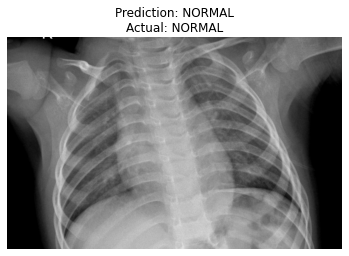

In [ ]:
predict_and_plot(efficientnet_model, path, random_category, classes)